In [164]:
#####本程序考虑边界为曲线的情况

In [165]:
from numpy import *
from pylab import *
import scipy as sp
from scipy.optimize import fmin_bfgs

In [166]:
data=loadtxt('C:/Users/sony/Desktop/data2.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]

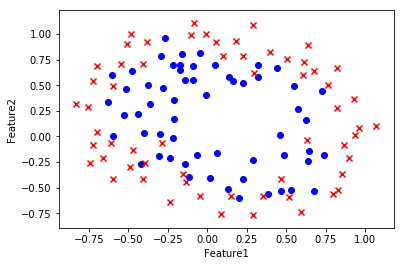

In [167]:
######图像展示
pos = where(y == 1)  
neg = where(y == 0)  
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')  
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')  
xlabel('Feature1')  
ylabel('Feature2')
show() 

In [168]:
#####sigmoid函数
def sigmoid(X):
    a=1.0+e**(-X)
    z=1.0/a
    return z

In [169]:
def map_feature(x1, x2):  
    ''''' 
    Maps the two input features to polonomial features. 
    Returns a new feature array with more features of 
    1, X1, X2, X1 ** 2, X1*X2, X2 ** 2, etc... 
    '''  
    ##增加x1,x2的维度
    x1.shape =(x1.size,1)  
    x2.shape =(x2.size,1)  
    
    degree =2  
    mapped_fea = ones(shape=(x1[:,0].size,1))  
    m, n = mapped_fea.shape  
    for i in range(1, degree +1):  
        for j in range(i +1):  
            r =(x1 **(i - j))*(x2 ** j)  
            mapped_fea = append(mapped_fea,r, axis=1)
    return mapped_fea    

In [170]:
def cost_function_reg(theta, X, y, l):  
    '''''Compute the cost  '''  
    h = sigmoid(X.dot(theta))  
    #thetaR = theta[1:,0].reshape(theta.shape[0]-1,1)
    thetaR=zeros([theta.shape[0]-1,1])
    for i in range(theta.shape[0]-1):
        thetaR[i]=theta[i+1]
        
    J =(1.0/ m)*((-y.T.dot(log(h)))-((1- y.T).dot(log(1.0- h))))+(l /(2.0* m))*(thetaR.T.dot(thetaR))  
    
    #return J.flatten(), out.T.flatten()  
    return J

In [171]:
def function_grad(theta, X, y, l):
    h = sigmoid(X.dot(theta))
    
    
    thetaR=zeros([theta.shape[0]-1,1])
    for i in range(theta.shape[0]-1):
        thetaR[i]=theta[i+1]
    #thetaR =theta[1:,0].reshape(theta.shape[0]-1,1)
    
    delta = h - y  
    sum_delta = delta.T.dot(X[:,1])  
    grad1 =(1.0/ m)* sum_delta  
    
    XR = X[:,1:X.shape[1]]  
    sum_delta = XR.T.dot(delta) 
    grad =(1.0/ m)*(sum_delta + l * thetaR)  
    
    out = zeros(shape=(grad.shape[0]+1, grad.shape[1]))  
    out[0,]= grad1  
    out[1:,]= grad  
    return out

In [172]:
###############################测试函数cost_function_reg
m, n = X.shape  
y.shape =(m,1)  
it = map_feature(X[:,0], X[:,1])  
#Initialize theta parameters  
initial_theta = zeros(shape=(it.shape[1],1))  
#Use regularization and set parameter lambda to 1  
l =1  
# Compute and display initial cost and gradient for regularized logistic regression  
cost=cost_function_reg(initial_theta, it, y, l)
grad=function_grad(initial_theta, it, y, l)
print(cost)
print(grad)
grad.shape

[[ 0.69314718]]
[[  1.87880932e-02]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]
 [  3.76648474e-02]]


(6, 1)

In [174]:
######此处使用scipy中optimize中的fmin_bfgs函数
def decorated_cost(theta):  
    return cost_function_reg(theta, it, y, l) 
def decorated_grad(theta):  
    return function_grad(theta, it, y, l) 
result=fmin_bfgs(decorated_cost, initial_theta,fprime=decorated_grad,maxiter=1000)
print(result)

ValueError: shapes (6,118) and (6,118) not aligned: 118 (dim 1) != 6 (dim 0)

In [ ]:
u = linspace(-1,1.5,50)  
v = linspace(-1,1.5,50)  
z = zeros(shape=(len(u), len(v)))  
for i in range(len(u)):  
    for j in range(len(v)):  
        z[i, j]=(map_feature(array(u[i]), array(v[j])).dot(array(theta)))  
z = z.T  
contour(u, v, z)  
title('lambda = %f'% l)  
xlabel('Microchip Test 1')  
ylabel('Microchip Test 2')  
legend(['y = 1','y = 0','Decision boundary'])  
show()  
def predict(theta, X):  
    '''''Predict whether the label 
    is 0 or 1 using learned logistic 
    regression parameters '''  
    m, n = X.shape  
    p = zeros(shape=(m,1))  
    h = sigmoid(X.dot(theta.T))  
    for it in range(0, h.shape[0]):  
        if h[it]>0.5:  
            p[it,0]=1  
        else:  
            p[it,0]=0  
    return p  
#% Compute accuracy on our training set  
p = predict(array(theta), it)  
print'Train Accuracy: %f'%((y[where(p == y)].size / float(y.size))*100.0)  